# Stats 2550 HW7

## Hayden Copenhafer U1113702

In [1]:
#boilerplate
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format='svg'
from scipy import stats


#data
B1ydsper=[8.39,7.67,7.66,7.98,7.21,7.53,8.01,7.66,7.21,7.16,7.93,7.1,6.33,6.76,6.86,7.35,7.22,7.94,6.41,6.77,6.65,6.94,
          6.45,7.04,6.39,6.58,6.21,7.17,6.34,6.18,5.12,5.71]

B1rtg=[105.5,97.4,96.9,96.2,95,93.8,92.7,91.4,90.2,89.4,87.7,87.5,87,86.4,86.4,86,85.4,84.7,84.3,81.7,81,80.3,80.2,80.1,
       79.6,77.1,76,73.7,72.6,71.4,70,66.5]

B2sale=[25.9,29.5,27.9,25.9,29.9,29.9,30.9,28.9,35.9,31.5,31,30.9,30,36.9,41.9,40.5,43.9,37.5,37.9,44.5,37.9,38.9,36.9,
       45.8]

B2taxes=[4.9176,5.0208,4.5429,4.5573,5.0597,3.891,5.898,5.6039,5.8282,5.3003,6.2712,5.9592,5.05,8.2464,6.6969,7.7841,
        9.0384,5.9894,7.5422,8.7951,6.0831,8.3607,8.14,9.1416]

B4comp=[3040,2470,3610,3480,3810,2330,1800,3110,3160,2310,4360,1880,3670,1740,2250,2650,4970,2620,2900,1670,2540,3840,3800,
       4600,1900,2530,2920,4990,1670,3310,3450,3600,2850,1590,3770,3850,2480,3570,2620,1890,3030,3030]

B4dens=[29.2,24.7,32.3,31.3,31.5,24.5,19.9,27.3,27.1,24,33.8,21.5,32.2,22.5,27.5,25.6,34.5,26.2,26.7,21.1,24.1,30.7,32.7,
       32.6,22.1,25.3,30.8,38.9,22.1,29.2,30.1,31.4,26.7,22.1,30.3,32,23.2,30.3,29.9,20.8,33.2,28.2]

## B1)

### a)

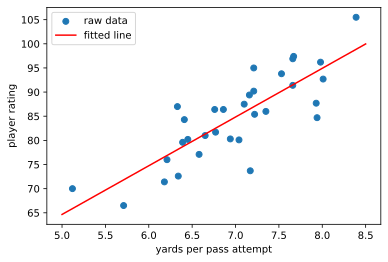

Slope: 10.091744603211062
Intercept: 14.1954884688421


In [2]:
res=stats.linregress(B1ydsper,B1rtg) #scipy stats package which calculates the least squares linear regression model
plt.scatter(B1ydsper,B1rtg,label='raw data') #create scatterplot of raw data with appropriate label
x=np.linspace(5,8.5,100) #create 100 evenly spaced points to use in graph linear model
fit=x*res.slope+res.intercept #formula for linear fit
plt.plot(x,fit,'r',label='fitted line') #plot linear fit model in red with appropriate label
plt.xlabel('yards per pass attempt') #label axes
plt.ylabel('player rating')
plt.legend()
plt.show()
print('Slope:',res.slope) #print the slope and intercept values with appropriate labels
print('Intercept:',res.intercept)

### b)

For each additional yard covered by a typical player's passing attempt average, their rating increases by 10.1 points. A hypothetical player with a 0 yard passing average would have a rating of 14.2.

### c)

To find the increase in average yards passed needed to increase a rating by 10 points, we can simply calculate $\frac{y}{b_1}$, or in other words $\frac{10}{10.0917}=\boxed{0.991 yards}$

### d)

A player with a passing average of 7.21 yards can have their rating estimated by plugging into the model $y=b_0+b_1x$. 

$$14.20+10.09*7.21=\boxed{86.95}$$

## B2)

### a)

In [23]:
res2=stats.linregress(B2taxes,B2sale)
print('Slope:',res.slope,'Intercept:',res.intercept)

Slope: 3.324371233219344 Intercept: 13.320179282166198


### b)

In [24]:
#same process as B1, just done in a code block instead
print('The mean selling price if 7.5% taxes are paid is:',res2.intercept+res2.slope*7.5,'thousand dollars')

The mean selling price if 7.5% taxes are paid is: 38.25296353131128 thousand dollars


We can use $y=b_0+b_1x$ to estimate the mean purchase price for a home if 7.5% taxes are paid. Plugging in this value along with the calculated slope and intercept gives a purchase price of $38.25 thousand.

### c)

In [25]:
est=res2.slope*5.898+res2.intercept #find estimate for purchase price using linear fit model at 5.898

#the residual value is the absolute value of the difference between the real data value and the estimate
residual=np.abs(B2sale[7]-est) 
print(residual)


4.027320815693891


The residual of our model at 5.898% taxes is 4.027 thousand dollars.

### d)

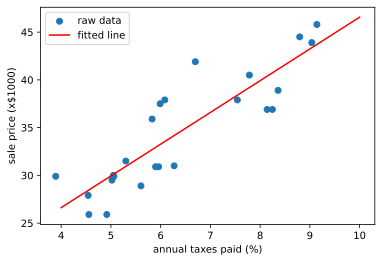

R^2: 0.7673343737532007


In [28]:
res2=stats.linregress(B2taxes,B2sale)
plt.scatter(B2taxes,B2sale,label='raw data')
x2=np.linspace(4,10,100)
fit2=x2*res2.slope+res2.intercept
plt.plot(x2,fit2,'r',label='fitted line')
plt.xlabel('annual taxes paid (%)')
plt.ylabel('sale price (x$1000)')
plt.legend()
plt.show()
print('R^2:',res2.rvalue**2)

The plot does indicate that taxes paid is an effective regressor variable in predicting selling price. This is reflected in the relatively high $R^2$ value of 0.767, indicating that a high percentage of variability in the sales price can be explained by our linear fit model.



## B3)

### a)

In [50]:
print(len(B2sale)-2) #n-2=df

22


For $\alpha$=0.01, a 99% confidence interval, $t_{1-\alpha/2}$=0.995. Our degrees of freedom will be n-2=22. Going to the t-tables and finding where the two tail $\alpha$ column and df=22 rows intersect gives our critical t value of 2.82. The formula for a regression line confidence interval is:

$$
CI=b_1\pm T^\star*SE
$$

In [36]:
print('b1:',res2.slope,'SE:',res2.stderr) #print slope and std error of slope of regression model

b1: 3.324371233219344 SE: 0.3902761044118832


In [47]:
Tstar=2.82
CI1=res2.slope-Tstar*res2.stderr #lower and upper bounds of slope based on formula above
CI2=res2.slope+Tstar*res2.stderr
print('The 99% CI for the regression slope is:')
print('(',CI1,',',CI2,')')

print('p-value:',res2.pvalue) 

The 99% CI for the regression slope is:
( 2.2237926187778334 , 4.424949847660855 )
p-value: 2.05125746820956e-08


The p value from our regression model is 0.0000000205 which is much smaller than our $\alpha$ of 0.01. This means that we can reject the null hypothesis that $b_1=0$ and be confident in the fact that a relationship does exist between our two variables.

### b)

In [48]:
print('Slope std. error:',res2.stderr)
print('Intercept std. error:',res2.intercept_stderr)

Slope std. error: 0.3902761044118832
Intercept std. error: 2.571721751484013


## B4)

### a)

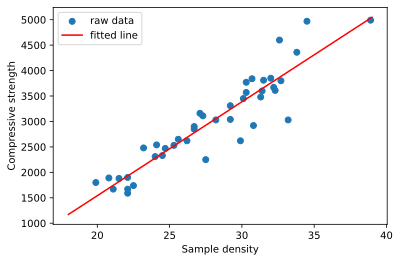

In [137]:
res4=stats.linregress(B4dens,B4comp)
plt.scatter(B4dens,B4comp,label='raw data')
x4=np.linspace(18,39,42)
fx4=res4.intercept+x4*res4.slope
plt.plot(x4,fx4,'r',label='fitted line')
plt.legend()
plt.xlabel('Sample density')
plt.ylabel('Compressive strength')
plt.show()

### b)

In [68]:
print(res4.pvalue)

1.172073031699965e-18


Since our p-value of $1.17\times10^{-18}$ is far smaller than our chosen $\alpha$ of 0.05, we can reject the null hyothesis that $b_1=0$ and accept that there is a high chance that correlation between our two variables does exist.

### c)

In [69]:
print('R squared:',res4.rvalue**2) #print the square of the r value to give R^2

R squared: 0.8597249223930703


An $R^2$ value of 0.86 means that 86% of the variability in the compressive strength data can be explained by our model. This is a relatively high value and means that our least squares regression line provides a good estimate of reality.

### d)

C:\Users\hayde\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


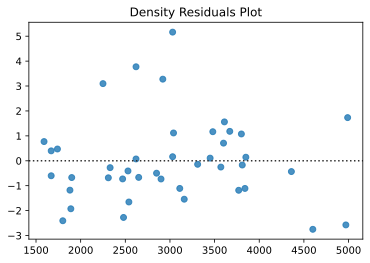

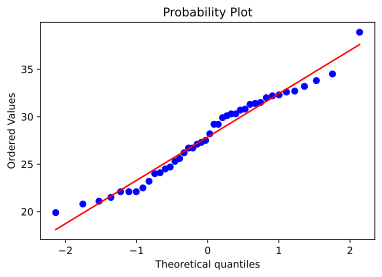

C:\Users\hayde\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


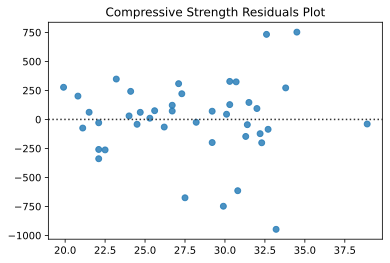

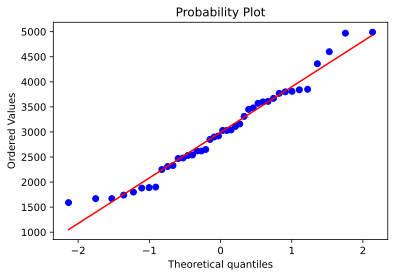

In [195]:
import seaborn as sb
from scipy import stats

#the seaborn residplot function regresses y on x and plots the residuals
sb.residplot(B4comp,B4dens,data=())
plt.title('Density Residuals Plot') #add title
plt.show()

#probability plot function from scipy.stats
res=stats.probplot(B4dens,plot=plt)
plt.show()

sb.residplot(B4dens,B4comp,data=())
plt.title('Compressive Strength Residuals Plot')
plt.show()

res1=stats.probplot(B4comp,plot=plt)
plt.show()

Our conditions for performing least squares linear regression are met. The residuals plots do not fan out or converge meaning constant variability is met. Additionally, the normality of residuals requirement seems to be met since it appears we have an even and random spread of points on both residuals plots. Finally, the linearity condition seems to be met based on the consistent slope of our initial scatterplot. There is some slight nonlinearity in both normal probability plots but this is minor and likely to be within acceptable limits.